<a href="https://colab.research.google.com/github/nbacomdados/nbacomdados/blob/main/notebooks/analise1_BucksXNets_jogo7_Leste_SemiFinal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Imports

In [51]:
import pandas as pd
import numpy as np

#URLS

In [2]:
url_placar = 'https://raw.githubusercontent.com/nbacomdados/nbacomdados/main/dados/placar_BucksXNets_jogo7_Leste_SemiFinal.csv'
url_2times = 'https://raw.githubusercontent.com/nbacomdados/nbacomdados/main/dados/BucksXNets_jogo7_Leste_SemiFinal.csv'
url_nets = 'https://raw.githubusercontent.com/nbacomdados/nbacomdados/main/dados/nets_BucksXNets_jogo7_Leste_SemiFinal.csv'
url_bucks = 'https://raw.githubusercontent.com/nbacomdados/nbacomdados/main/dados/bucks_BucksXNets_jogo7_Leste_SemiFinal.csv'

#Placar

In [34]:
df_placar = pd.read_csv(url_placar).drop(['Unnamed: 0'], axis='columns')

In [35]:
nomes_colunas = df_placar.columns.to_list()
nomes_colunas.pop(0)
nomes_colunas.insert(0, 'Times')
df_placar.columns = nomes_colunas

In [36]:
df_placar

,Times,1,2,3,4,OT,T
0,MIL,25,22,35,27,6,115
1,BKN,28,25,28,28,2,111


#Jogo

In [31]:
df_2times = pd.read_csv(url_2times).drop(['Unnamed: 0'], axis='columns')

In [32]:
df_2times.columns = ['Estatistica', 'MIL', 'BKN']

In [33]:
df_2times = df_2times.set_index('Estatistica').T
df_2times

Estatistica,FG,Field Goal %,3PT,Three Point %,FT,Free Throw %,Rebounds,Offensive Rebounds,Defensive Rebounds,Assists,Steals,Blocks,Total Turnovers,Points Off Turnovers,Fast Break Points,Points in Paint,Fouls,Technical Fouls,Flagrant Fouls,Largest Lead
MIL,43-98,43.9,15-36,41.7,14-21,66.7,48,18,30,20,9,7,8,13,8,42,20,0,0,6
BKN,39-84,46.4,12-39,30.8,21-25,84.0,46,11,35,23,4,3,13,20,9,42,20,1,0,10


#NETS

In [29]:
df_nets = pd.read_csv(url_nets).drop(['Unnamed: 0'], axis='columns')
df_nets

,Starters,MIN,FG,3PT,FT,OREB,DREB,REB,AST,STL,BLK,TO,PF,+/-,PTS
0,Bench,MIN,FG,3PT,FT,OREB,DREB,REB,AST,STL,BLK,TO,PF,+/-,PTS
1,K. DurantK. DurantPF,53,17-36,4-11,10-11,1,8,9,6,1,1,3,4,-4,48
2,B. GriffinB. GriffinPF,40,7-12,3-6,0-0,2,9,11,3,0,0,2,6,-4,17
3,J. HarrisJ. HarrisSF,47,3-10,3-9,1-2,2,7,9,2,0,0,1,0,-1,10
4,B. BrownB. BrownSF,52,7-9,0-1,0-2,4,2,6,2,2,1,3,4,-7,14
5,J. HardenJ. HardenSG,53,5-17,2-12,10-10,1,8,9,9,1,1,4,3,-4,22
6,J. GreenJ. GreenPF,13,0-0,0-0,0-0,1,0,1,1,0,0,0,3,+2,0
7,N. ClaxtonN. ClaxtonPF,0,0-0,0-0,0-0,0,0,0,0,0,0,0,0,0,0
8,L. ShametL. ShametSG,7,0-0,0-0,0-0,0,1,1,0,0,0,0,0,-2,0
9,A. JohnsonA. JohnsonPF,DNP-COACH'S DECISION,DNP-COACH'S DECISION,DNP-COACH'S DECISION,DNP-COACH'S DECISION,DNP-COACH'S DECISION,DNP-COACH'S DECISION,DNP-COACH'S DECISION,DNP-COACH'S DECISION,DNP-COACH'S DECISION,DNP-COACH'S DECISION,DNP-COACH'S DECISION,DNP-COACH'S DECISION,DNP-COACH'S DECISION,DNP-COACH'S DECISION


#BUCKS

In [30]:
df_bucks = pd.read_csv(url_bucks).drop(['Unnamed: 0'], axis='columns')
df_bucks

,Starters,MIN,FG,3PT,FT,OREB,DREB,REB,AST,STL,BLK,TO,PF,+/-,PTS
0,Bench,MIN,FG,3PT,FT,OREB,DREB,REB,AST,STL,BLK,TO,PF,+/-,PTS
1,P.J. TuckerP.J. TuckerPF,38,4-9,3-5,0-0,4,1,5,0,3,2,0,6,-4,11
2,G. AntetokounmpoG. AntetokounmpoPF,50,15-24,2-6,8-14,2,11,13,5,0,1,3,3,+6,40
3,K. MiddletonK. MiddletonSF,52,9-26,2-7,3-3,4,6,10,6,5,0,3,2,+3,23
4,B. LopezB. LopezC,46,7-11,3-4,2-2,5,3,8,1,1,4,0,1,+2,19
5,J. HolidayJ. HolidayPG,48,5-23,2-9,1-2,2,5,7,8,0,0,1,5,+3,13
6,T. AntetokounmpoT. AntetokounmpoSF,1,0-0,0-0,0-0,0,1,1,0,0,0,0,1,-2,0
7,P. ConnaughtonP. ConnaughtonSG,23,3-5,3-5,0-0,1,3,4,0,0,0,0,2,+10,9
8,B. ForbesB. ForbesSG,5,0-0,0-0,0-0,0,0,0,0,0,0,0,0,+2,0
9,M. DiakiteM. DiakitePF,DNP-COACH'S DECISION,DNP-COACH'S DECISION,DNP-COACH'S DECISION,DNP-COACH'S DECISION,DNP-COACH'S DECISION,DNP-COACH'S DECISION,DNP-COACH'S DECISION,DNP-COACH'S DECISION,DNP-COACH'S DECISION,DNP-COACH'S DECISION,DNP-COACH'S DECISION,DNP-COACH'S DECISION,DNP-COACH'S DECISION,DNP-COACH'S DECISION


# E AGORA ?

In [93]:
df_2times.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2 entries, MIL to BKN
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   FG                    2 non-null      object
 1   Field Goal %          2 non-null      object
 2   3PT                   2 non-null      object
 3   Three Point %         2 non-null      object
 4   FT                    2 non-null      object
 5   Free Throw %          2 non-null      object
 6   Rebounds              2 non-null      object
 7   Offensive Rebounds    2 non-null      object
 8   Defensive Rebounds    2 non-null      object
 9   Assists               2 non-null      object
 10  Steals                2 non-null      object
 11  Blocks                2 non-null      object
 12  Total Turnovers       2 non-null      object
 13  Points Off Turnovers  2 non-null      object
 14  Fast Break Points     2 non-null      object
 15  Points in Paint       2 non-null      object


In [52]:
def highlight_max(s, props=''):
    return np.where(s == np.nanmax(s.values), props, '')

In [55]:
df_2times.T.style.apply(highlight_max, props='color:white;background-color:darkblue', axis=1)

,MIL,BKN
Estatistica,,
FG,43-98,39-84
Field Goal %,43.9,46.4
3PT,15-36,12-39
Three Point %,41.7,30.8
FT,14-21,21-25
Free Throw %,66.7,84.0
Rebounds,48,46
Offensive Rebounds,18,11
Defensive Rebounds,30,35


In [88]:
def pontos_jogo(time: str):
  pontos_dois = (int(df_2times.loc[time]['FG'][:2]) - int(df_2times.loc[time]['3PT'][:2])) * 2
  pontos_tres = int(df_2times.loc[time]['3PT'][:2]) * 3
  pontos_um = int(df_2times.loc[time]['FT'][:2])
  pontos_total = pontos_dois + pontos_tres + pontos_um

  porcentagem_tres = pontos_tres/pontos_total * 100
  porcentagem_dois = pontos_dois/pontos_total * 100
  porcentagem_um = pontos_um/pontos_total * 100

  print(f'Total pontos: {pontos_total}')
  print(f'Pontos de 3 pontos {porcentagem_tres:.2f}%')
  print(f'Pontos de 2 pontos {porcentagem_dois:.2f}%')
  print(f'Pontos de 1 ponto {porcentagem_um:.2f}%')

In [90]:
pontos_jogo('MIL')

Total pontos: 115
Pontos de 3 pontos 39.13%
Pontos de 2 pontos 48.70%
Pontos de 1 ponto 12.17%


In [91]:
pontos_jogo('BKN')

Total pontos: 111
Pontos de 3 pontos 32.43%
Pontos de 2 pontos 48.65%
Pontos de 1 ponto 18.92%


In [57]:
df_placar

,Times,1,2,3,4,OT,T
0,MIL,25,22,35,27,6,115
1,BKN,28,25,28,28,2,111


In [2]:
import pandas as pd

In [8]:
game_id = '0042000217'
name_folder = f'{game_id}_Nets_Bucks'
for num in range(1,6):
    globals()[f"df_players_Q{num}"] = pd.read_csv(f'../dados/{name_folder}/{game_id}_players_Q{num}.csv')

In [9]:
df_players_Q1.head()

,personId,firstName,familyName,nameI,playerSlug,position,comment,jerseyNum,statistics.minutes,statistics.fieldGoalsMade,...,statistics.reboundsDefensive,statistics.reboundsTotal,statistics.assists,statistics.steals,statistics.blocks,statistics.turnovers,statistics.foulsPersonal,statistics.points,statistics.plusMinusPoints,teamName
0,200782,P.J.,Tucker,P. Tucker,pj-tucker,F,NaN,NaN,8:37,1,...,1,1,0,0,2,0,1,3,0.0,Bucks
1,203507,Giannis,Antetokounmpo,G. Antetokounmpo,giannis-antetokounmpo,F,NaN,NaN,11:18,4,...,1,2,1,0,1,1,1,10,-3.0,Bucks
2,201572,Brook,Lopez,B. Lopez,brook-lopez,C,NaN,NaN,11:23,1,...,1,2,1,0,0,0,0,3,-1.0,Bucks
3,203114,Khris,Middleton,K. Middleton,khris-middleton,G,NaN,NaN,11:21,2,...,2,5,1,0,0,1,0,5,-4.0,Bucks
4,201950,Jrue,Holiday,J. Holiday,jrue-holiday,G,NaN,NaN,12:00,2,...,0,1,1,0,0,1,1,4,-3.0,Bucks


In [52]:
df_players_Q1['Q'] = 1
df_players_Q2['Q'] = 2
df_players_Q3['Q'] = 3
df_players_Q4['Q'] = 4
df_players_Q14 = df_players_Q1.append(df_players_Q2).append(df_players_Q3).append(df_players_Q4)

In [53]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

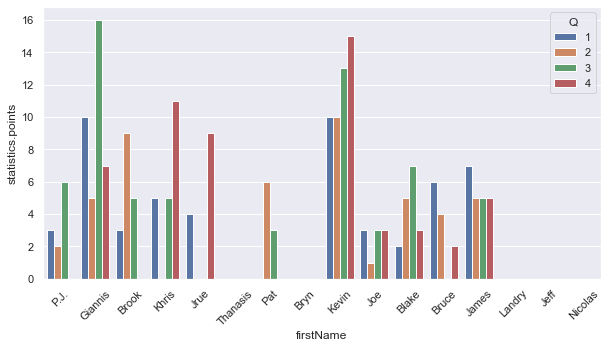

In [54]:
fig, ax = plt.subplots(figsize=(10, 5))
sns.barplot(data=df_players_Q14, y='statistics.points', x='firstName', hue='Q', ax=ax)
plt.xticks(rotation=45)
plt.legend(title='Q', loc=1)
plt.show()

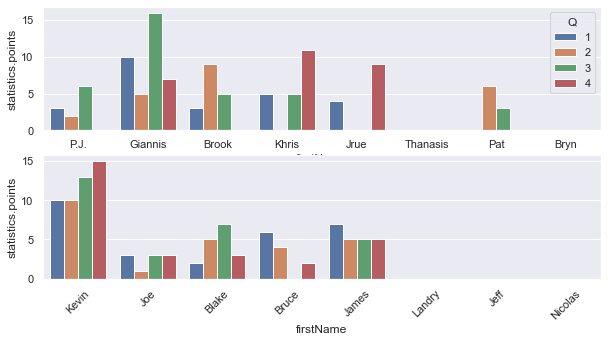

In [60]:
fig, axs = plt.subplots(2, 1, figsize=(10, 5))

sns.barplot(data=df_players_Q14.query('teamName == "Bucks"'), y='statistics.points', x='firstName', hue='Q', ax=axs[0])
plt.xticks(rotation=45)


sns.barplot(data=df_players_Q14.query('teamName == "Nets"'), y='statistics.points', x='firstName', hue='Q', ax=axs[1])
plt.xticks(rotation=45)
plt.legend('').set_visible(False)

plt.show()